In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('data/adult/adult.csv', header=None)
df_test = pd.read_csv('data/adult/adult_test.csv', header=None)

In [3]:
# Manuelles Zuweisen von Spaltennamen
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df_train.columns = column_names
df_test.columns = column_names


In [5]:
# Mergen der beiden DataFrames
df_merged = pd.concat([df_train, df_test], ignore_index=True)

# Ersetzen von ? durch NaN, damit sie als fehlende Werte erkannt werden
relevant_columns = ['workclass', 'occupation', 'native_country']
df_merged[relevant_columns] = df_merged[relevant_columns].replace(' ?', pd.NA)

In [21]:
df_merged.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
missing_percentages = df_merged.isna().mean() * 100
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)
unique_values_per_column = df_merged.nunique()
unique_values_sorted = unique_values_per_column.sort_values(ascending=False)


In [18]:
missing_table = pd.DataFrame({'Prozentsatz fehlender Werte': missing_percentages_sorted})
print("Tabelle für Prozentsatz fehlender Werte:")
print(missing_table)

Tabelle für Prozentsatz fehlender Werte:
                Prozentsatz fehlender Werte
occupation                         5.751198
workclass                          5.730724
native_country                     1.754637
age                                0.000000
fnlwgt                             0.000000
education                          0.000000
education_num                      0.000000
marital_status                     0.000000
relationship                       0.000000
race                               0.000000
sex                                0.000000
capital_gain                       0.000000
capital_loss                       0.000000
hours_per_week                     0.000000
income                             0.000000


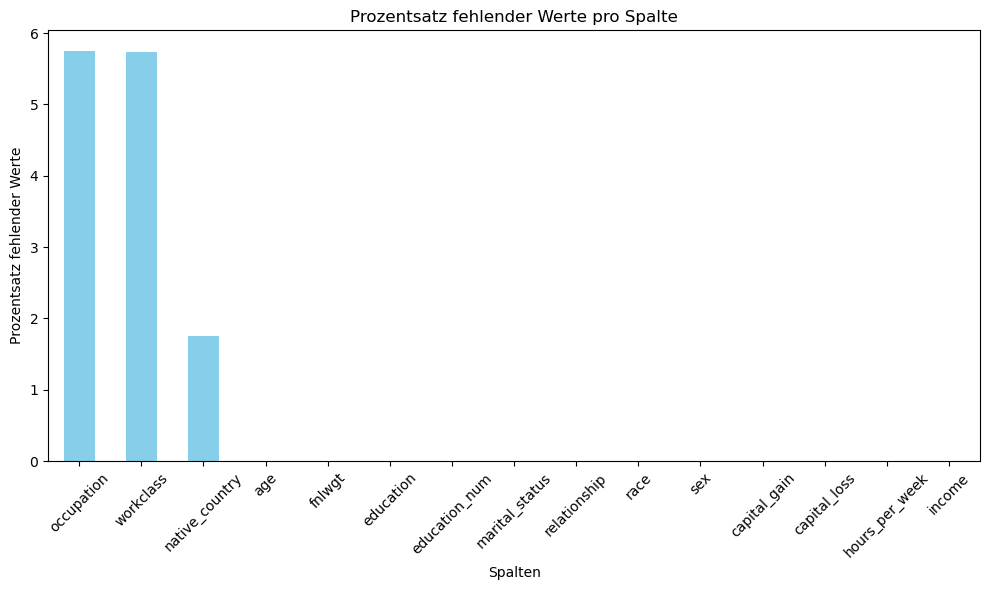

In [16]:
plt.figure(figsize=(10, 6))
missing_percentages_sorted.plot(kind='bar', color='skyblue')
plt.title('Prozentsatz fehlender Werte pro Spalte')
plt.xlabel('Spalten')
plt.ylabel('Prozentsatz fehlender Werte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
unique_table = pd.DataFrame({'Anzahl eindeutiger Werte': unique_values_sorted})
print("\nTabelle für Anzahl eindeutiger Werte:")
print(unique_table)


Tabelle für Anzahl eindeutiger Werte:
                Anzahl eindeutiger Werte
fnlwgt                             28523
capital_gain                         123
capital_loss                          99
hours_per_week                        96
age                                   74
native_country                        41
education                             16
education_num                         16
occupation                            14
workclass                              8
marital_status                         7
relationship                           6
race                                   5
income                                 4
sex                                    2


<Figure size 1000x800 with 0 Axes>

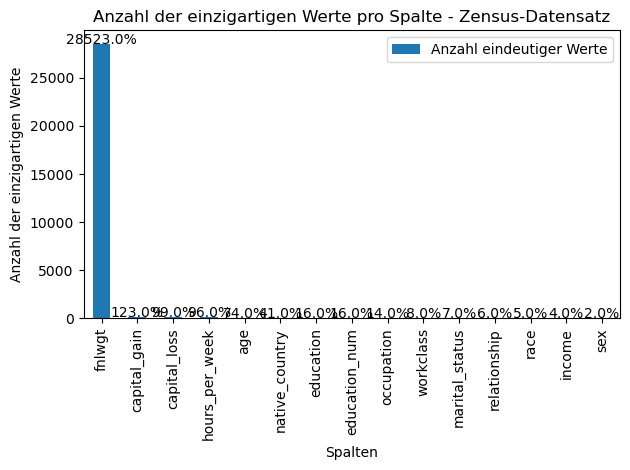

In [24]:
unique_table = unique_table[unique_table > 1]  # Filtern nur eindeutige Werte

plt.figure(figsize=(10, 8))
ax =unique_table.plot(kind='bar')
plt.title('Anzahl der einzigartigen Werte pro Spalte - Zensus-Datensatz')
plt.xlabel('Spalten')
plt.ylabel('Anzahl der einzigartigen Werte')
plt.xticks(rotation=90)
plt.tight_layout()


for i, v in enumerate(unique_values_sorted):
    ax.text(i, v + 0.2, f'{v:.1f}%', ha='center')

plt.show()